<a href="https://colab.research.google.com/github/TanmayTopkhanewale/FRED-MD-Monthly-Economic-Data-EDA-PCA/blob/main/FRED_MD_Monthly_Economic_Data_EDA_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# FRED-MD Monthly Economic Data EDA & PCA
#This notebook performs exploratory data analysis (EDA) and principal component
#analysis (PCA) on the monthly macroeconomic dataset `2025-09-MD.csv`.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/2025-09-MD.csv")

In [ ]:
df_clean = df.iloc[1:].copy()
df_clean['sasdate'] = pd.to_datetime(df_clean['sasdate'])
df_clean = df_clean.set_index('sasdate')
for col in df_clean.columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

Remove the first row (transform codes)

**Transform codes** indicate what preprocessing was done to each economic variable in FRED-MD.

**Code 5** means the value is the first difference of the natural logarithm: (x_{t})-ln(x_{t-1})
This is the month-over-month percentage change (log return). It's commonly used to make the data stationary and suitable for analysis like PCA.
Further we parse dates, keep only numeric columns

In [ ]:
missing_pct = (df_clean.isnull().sum()/len(df_clean)*100)
df_clean = df_clean.drop(columns=missing_pct[missing_pct > 40].index)
df_clean = df_clean.fillna(method='ffill').fillna(method='bfill')

/tmp/ipython-input-668694320.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_clean.fillna(method='ffill').fillna(method='bfill')


In [ ]:
print(df_clean.info())
print(df_clean.describe().T.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 800 entries, 1959-01-01 to 2025-08-01
Columns: 125 entries, RPI to VIXCLSx
dtypes: float64(101), int64(24)
memory usage: 787.5 KB
None
                 count           mean            std           min  \
RPI              800.0    9688.818986    5170.562291    2583.56000   
W875RX1          800.0    8243.004750    4092.829251    2426.00000   
DPCERA3M086SBEA  800.0      57.369129      31.281718      15.18800   
CMRMTSPLx        800.0  832260.063623  390227.817636  265935.18770   
RETAILx          800.0  223531.920488  192048.418220   17689.23968   

                           25%          50%           75%          max  
RPI                5157.535000    8501.8580  1.379041e+04    22918.422  
W875RX1            4587.600000    7317.1000  1.163535e+04    16739.900  
DPCERA3M086SBEA      29.164000      49.3815  8.447225e+01      124.805  
CMRMTSPLx        489576.431750  725582.6865  1.186767e+06  1565742.000  
RETAILx           50510.86

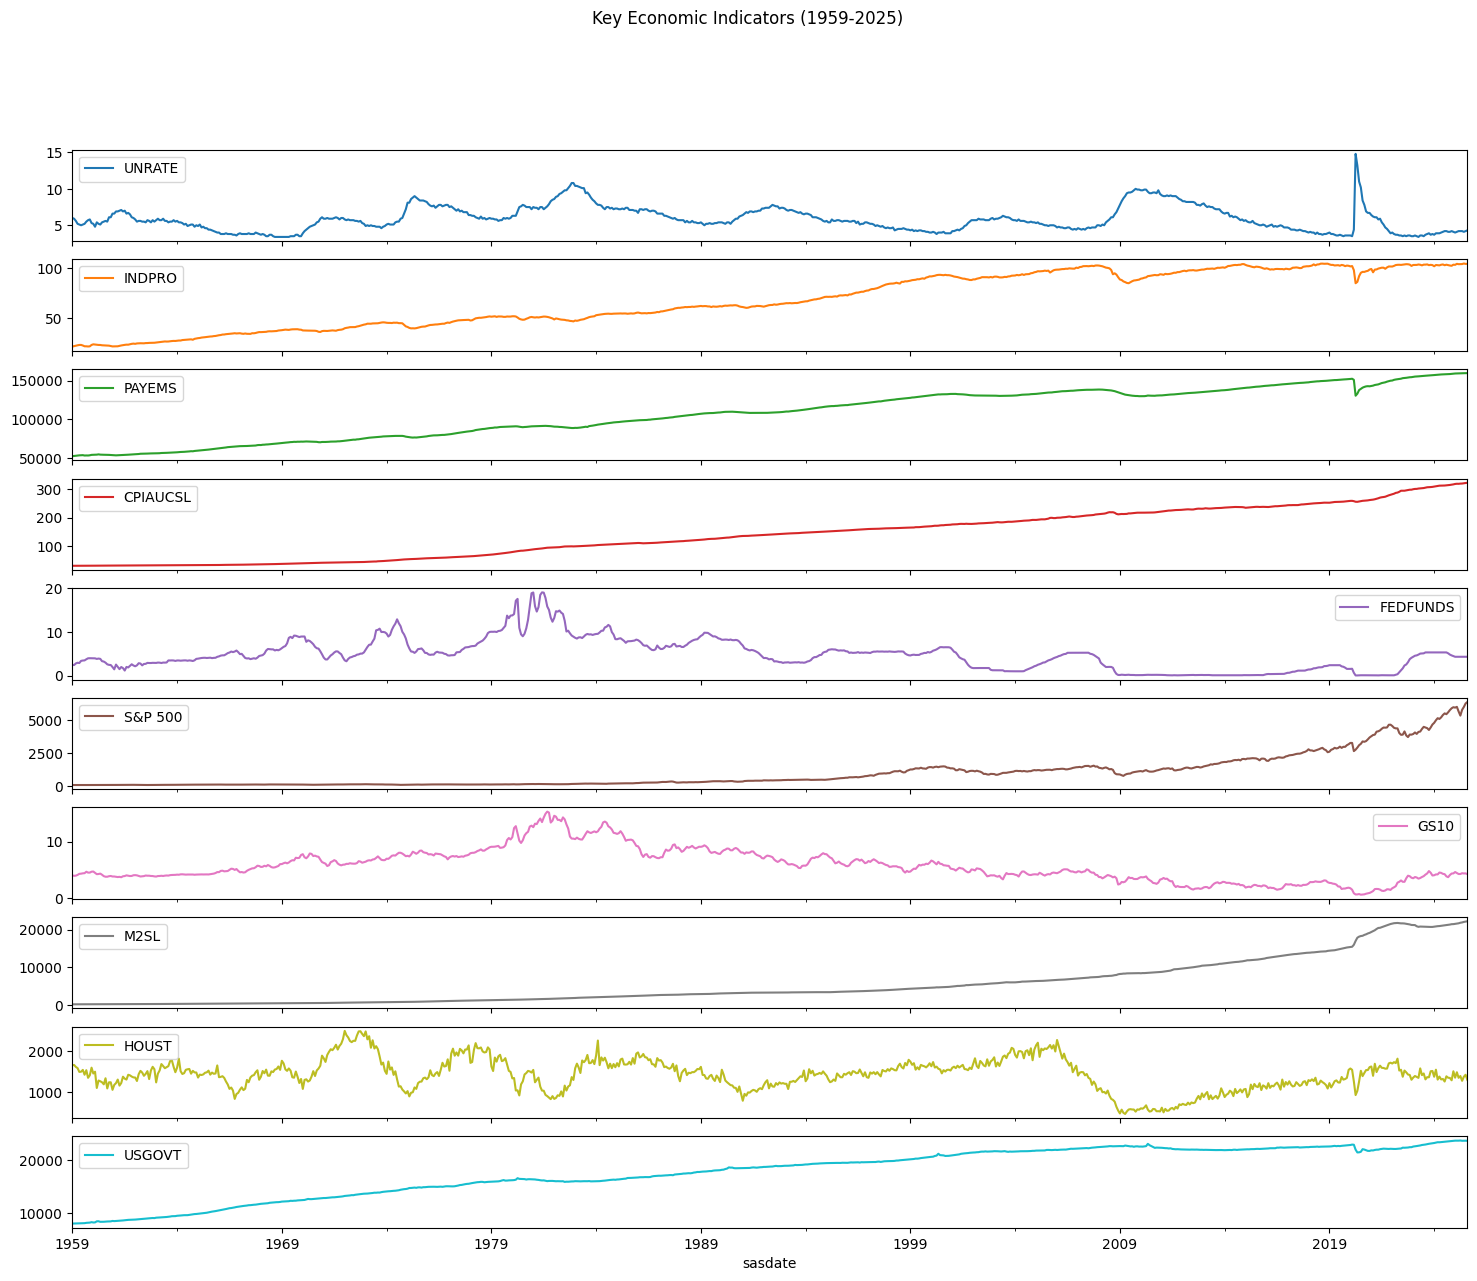

In [ ]:
key_indicators = ['UNRATE','INDPRO','PAYEMS','CPIAUCSL','FEDFUNDS','S&P 500','GS10','M2SL','HOUST','USGOVT']
key_indicators = [k for k in key_indicators if k in df_clean.columns]
df_clean[key_indicators].plot(subplots=True, figsize=(18,14))
plt.suptitle('Key Economic Indicators (1959-2025)')
plt.show()

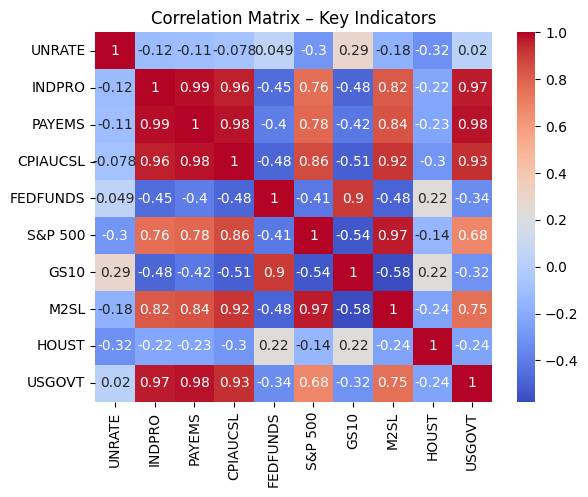

In [ ]:
sns.heatmap(df_clean[key_indicators].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix – Key Indicators')
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print(explained_variance_ratio,cumulative_variance_ratio)

[5.91758499e-01 1.09139555e-01 8.43182886e-02 6.46575015e-02
 3.48730796e-02 2.12136337e-02 1.79508369e-02 1.10394326e-02
 8.91226358e-03 8.43386234e-03 7.28783488e-03 5.48485450e-03
 4.61852801e-03 3.86143127e-03 2.88211259e-03 2.69919383e-03
 2.05624635e-03 1.99128049e-03 1.82987662e-03 1.64566755e-03
 1.51118048e-03 1.23775967e-03 1.14176369e-03 1.05183023e-03
 9.17046217e-04 8.10176354e-04 7.06101029e-04 6.10588262e-04
 5.64190844e-04 5.17243381e-04 4.45892392e-04 3.97169692e-04
 3.79228965e-04 3.11230090e-04 2.95059039e-04 2.56432808e-04
 2.27490757e-04 2.18258639e-04 1.91048489e-04 1.70403828e-04
 1.59505264e-04 1.46134652e-04 1.29101126e-04 1.05138255e-04
 9.97482306e-05 9.07338419e-05 8.08523203e-05 6.55836031e-05
 5.56842070e-05 5.16492930e-05 4.30658287e-05 4.14992259e-05
 3.48487412e-05 3.20171110e-05 3.11043989e-05 2.77974240e-05
 2.43607121e-05 2.00879583e-05 1.68582721e-05 1.66267580e-05
 1.46276922e-05 1.29435677e-05 1.07039939e-05 8.73148021e-06
 7.62802371e-06 6.576593

PC1: 0.592 (59.2%) | Cumulative: 0.592 (59.2%)
PC2: 0.109 (10.9%) | Cumulative: 0.701 (70.1%)
PC3: 0.084 (8.4%) | Cumulative: 0.785 (78.5%)
PC4: 0.065 (6.5%) | Cumulative: 0.850 (85.0%)
PC5: 0.035 (3.5%) | Cumulative: 0.885 (88.5%)
PC6: 0.021 (2.1%) | Cumulative: 0.906 (90.6%)
PC7: 0.018 (1.8%) | Cumulative: 0.924 (92.4%)
PC8: 0.011 (1.1%) | Cumulative: 0.935 (93.5%)
PC9: 0.009 (0.9%) | Cumulative: 0.944 (94.4%)
PC10: 0.008 (0.8%) | Cumulative: 0.952 (95.2%)
PC11: 0.007 (0.7%) | Cumulative: 0.960 (96.0%)
PC12: 0.005 (0.5%) | Cumulative: 0.965 (96.5%)
PC13: 0.005 (0.5%) | Cumulative: 0.970 (97.0%)
PC14: 0.004 (0.4%) | Cumulative: 0.974 (97.4%)
PC15: 0.003 (0.3%) | Cumulative: 0.976 (97.6%)
PC16: 0.003 (0.3%) | Cumulative: 0.979 (97.9%)
PC17: 0.002 (0.2%) | Cumulative: 0.981 (98.1%)
PC18: 0.002 (0.2%) | Cumulative: 0.983 (98.3%)
PC19: 0.002 (0.2%) | Cumulative: 0.985 (98.5%)
PC20: 0.002 (0.2%) | Cumulative: 0.987 (98.7%)
PC21: 0.002 (0.2%) | Cumulative: 0.988 (98.8%)
PC22: 0.001 (0.1%) |

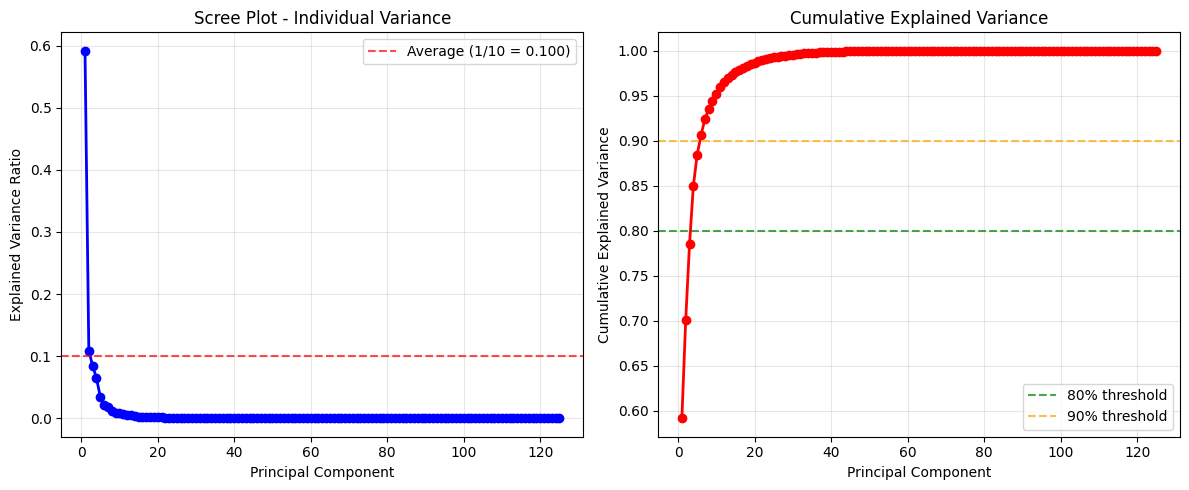

In [ ]:
# Explained variance analysis
for i, (ind_var, cum_var) in enumerate(zip(explained_variance_ratio, cumulative_variance_ratio)):
    print(f"PC{i+1}: {ind_var:.3f} ({ind_var*100:.1f}%) | Cumulative: {cum_var:.3f} ({cum_var*100:.1f}%)")

# Scree plot
plt.figure(figsize=(12, 5))

# Individual variance
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, 'bo-', linewidth=2)
plt.axhline(y=1/len(key_indicators), color='r', linestyle='--', alpha=0.7,
            label=f'Average (1/{len(key_indicators)} = {1/len(key_indicators):.3f})')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Individual Variance')
plt.grid(True, alpha=0.3)
plt.legend()

# Cumulative variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio, 'ro-', linewidth=2)
plt.axhline(y=0.8, color='g', linestyle='--', alpha=0.7, label='80% threshold')
plt.axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90% threshold')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

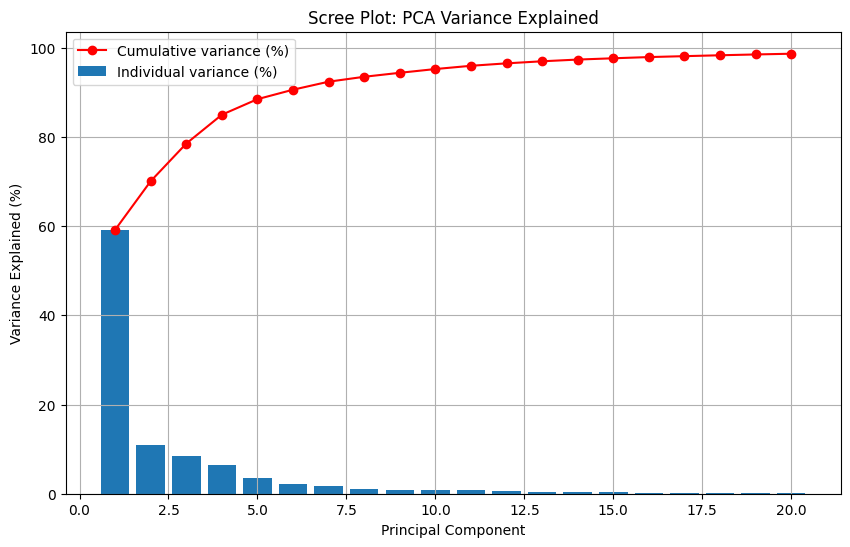

In [ ]:
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

plt.figure(figsize=(10,6))
plt.bar(np.arange(1,21), explained_var[:20]*100, label="Individual variance (%)")
plt.plot(np.arange(1,21), cum_var[:20]*100, color="red", marker="o", label="Cumulative variance (%)")
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Scree Plot: PCA Variance Explained')
plt.legend()
plt.grid()
plt.show()

In [ ]:
loadings = pd.DataFrame(pca.components_[:5, :].T, columns=[f'PC{i+1}' for i in range(5)], index=df_clean.columns)
print('Top 10 features (abs value) for first 5 PCs:')
for i in range(5):
    print(f'PC{i+1}:')
    print(loadings.iloc[:,i].abs().sort_values(ascending=False).head(10))

Top 10 features (abs value) for first 5 PCs:
PC1:
CUSR0000SA0L2      0.115674
CPIULFSL           0.115598
CPIAUCSL           0.115572
CUSR0000SA0L5      0.115473
DSERRG3M086SBEA    0.115464
PCEPI              0.115364
CUSR0000SAS        0.115300
DPCERA3M086SBEA    0.115256
CES3000000008      0.115156
CMRMTSPLx          0.115131
Name: PC1, dtype: float64
PC2:
USGOOD      0.232099
AAA         0.211101
BAA         0.207844
FEDFUNDS    0.204574
TB3MS       0.199887
GS10        0.197762
TB6MS       0.196789
GS1         0.196537
GS5         0.195896
CP3Mx       0.195515
Name: PC2, dtype: float64
PC3:
UNRATE       0.265710
HWIURATIO    0.234262
PERMIT       0.213812
HOUST        0.208790
HOUSTS       0.196224
UEMP15OV     0.194740
UEMP15T26    0.190578
PERMITMW     0.184747
CUMFNS       0.181678
UEMP5TO14    0.181070
Name: PC3, dtype: float64
PC4:
T5YFFM      0.249271
T10YFFM     0.244243
AAAFFM      0.234938
BAAFFM      0.212108
T1YFFM      0.196148
PERMITMW    0.189876
TB6SMFFM    0.176030


- **PC1**: General price levels & economic growth (CPI, PCE, retail sales, wages)
- **PC2**: Interest rates & monetary policy cycle (Fed funds, Treasury yields, bond spreads)
- **PC3**: Labor and housing cycle (unemployment, housing starts, permits)
- **PC4**: Term structure & credit spreads (yield curve shape, AAA/BAA spreads)
- **PC5**: Labor productivity & exchange rate (hours, dollar value, manufacturing)


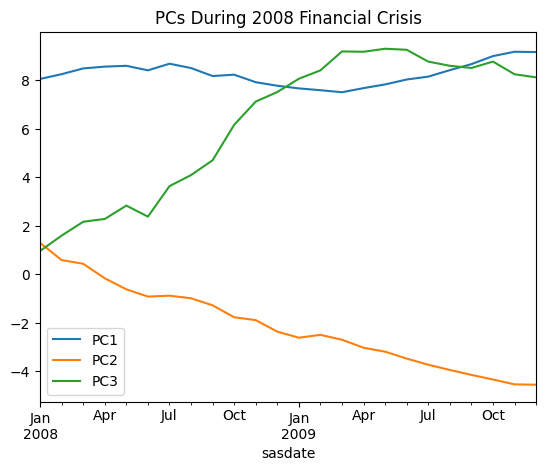

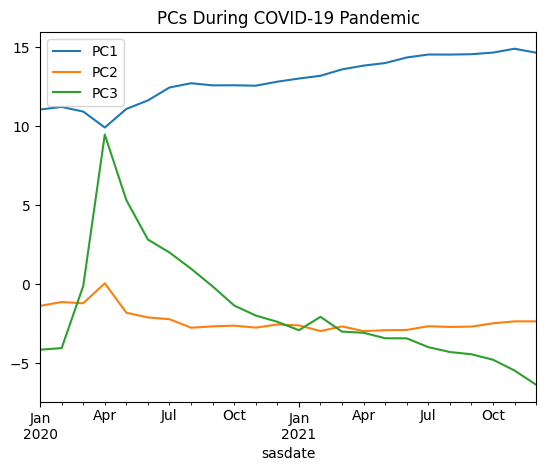

In [ ]:
pca_scores = pd.DataFrame(X_pca[:,:5], columns=[f'PC{i+1}' for i in range(5)], index=df_clean.index)
pca_scores.loc['2008':'2009'][['PC1','PC2','PC3']].plot(title='PCs During 2008 Financial Crisis')
pca_scores.loc['2020':'2021'][['PC1','PC2','PC3']].plot(title='PCs During COVID-19 Pandemic')
plt.show()

- **Recessions**: PC3 peaks during recession years (e.g., 1982, 1991, 2009)
- **Trends**: Recent years show high PC1/PC2, indicating inflation and monetary tightening
